In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv("IRIS.csv")

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset = dataset.drop(columns = "species",axis = 1)

In [5]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
sc = MinMaxScaler()

In [7]:
dataset["sepal_length"] = sc.fit_transform(dataset[["sepal_length"]])
dataset["sepal_width"] = sc.fit_transform(dataset[["sepal_width"]])



In [8]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,1.4,0.2
1,0.166667,0.416667,1.4,0.2
2,0.111111,0.500000,1.3,0.2
3,0.083333,0.458333,1.5,0.2
4,0.194444,0.666667,1.4,0.2


[]

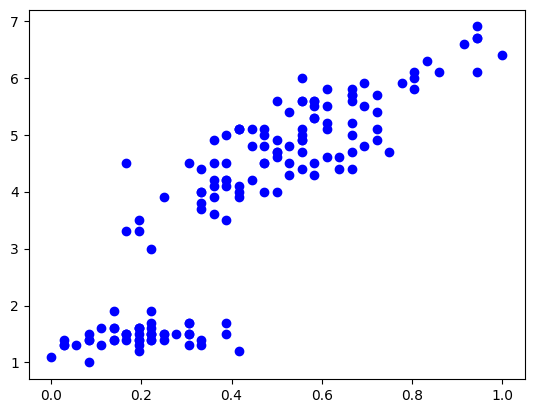

In [25]:
plt.scatter(dataset["sepal_length"],dataset["petal_length"],color = "blue")
plt.plot()

In [38]:
km = KMeans(n_clusters = 2)
km.fit(dataset[["sepal_length"]],dataset[["petal_length"]])

KMeans(n_clusters=2)

In [39]:
y_pred = km.predict(dataset[["sepal_length"]])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [40]:
dataset["cluster"] = y_pred

In [41]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,0.222222,0.625000,1.4,0.2,1
1,0.166667,0.416667,1.4,0.2,1
2,0.111111,0.500000,1.3,0.2,1
3,0.083333,0.458333,1.5,0.2,1
4,0.194444,0.666667,1.4,0.2,1


In [42]:
km.cluster_centers_ #---> centriods


array([[0.64179104],
       [0.25669344]])

[]

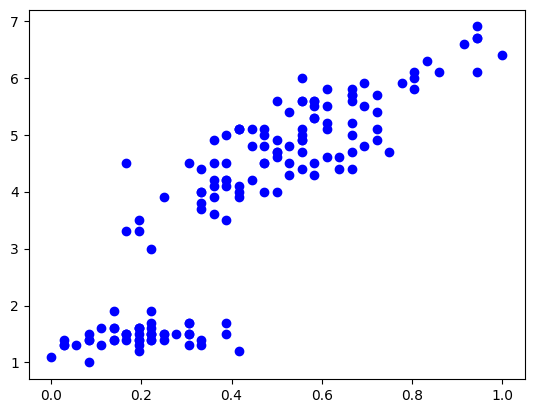

In [43]:
plt.scatter(dataset["sepal_length"],dataset["petal_length"],color = "blue")
plt.plot()

In [46]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(dataset[["sepal_length"]],dataset[["petal_length"]])
    sse.append(km.inertia_)

In [47]:
sse

[7.8833590534979425,
 2.385377607722209,
 1.2204184161238203,
 0.6371735517568853,
 0.4272347700321931,
 0.2800560306202667,
 0.20428471674804075,
 0.160231935366739,
 0.11577578704250245,
 0.08744974000858703]

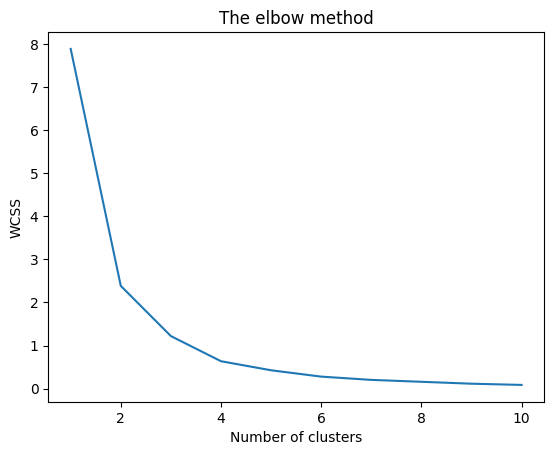

In [48]:
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
#cluster = 2